# Attrition in an Organization-------Why Workers Quit?

### Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

### Expensive in terms of both money and time to train new employees.
### Loss of experienced employees
### Impact in productivity
### Impact profit
### Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

### Business questions to brainstorm:
### What factors are contributing more to employee attrition?
### What type of measures should the company take in order to retain their employees?
### What business value does the model bring?
### Will the model save lots of money?
### Which business unit faces the attrition problem?

# Import Package

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding

In [2]:
# read the csv-type dataset as original dataset 

data = pd.read_csv(r'C:\Users\27079\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# check basic information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.isnull().sum()  #check missing value

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.nunique()    # check uniqueness of each column

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [8]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [9]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("--------------------------------------------------------------------------------------------")

Attrition : ['Yes' 'No']
--------------------------------------------------------------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------------------------------------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
--------------------------------------------------------------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
--------------------------------------------------------------------------------------------
Gender : ['Female' 'Male']
--------------------------------------------------------------------------------------------
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
---------------------------------------------

# 2. Data Visualisation

In [10]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

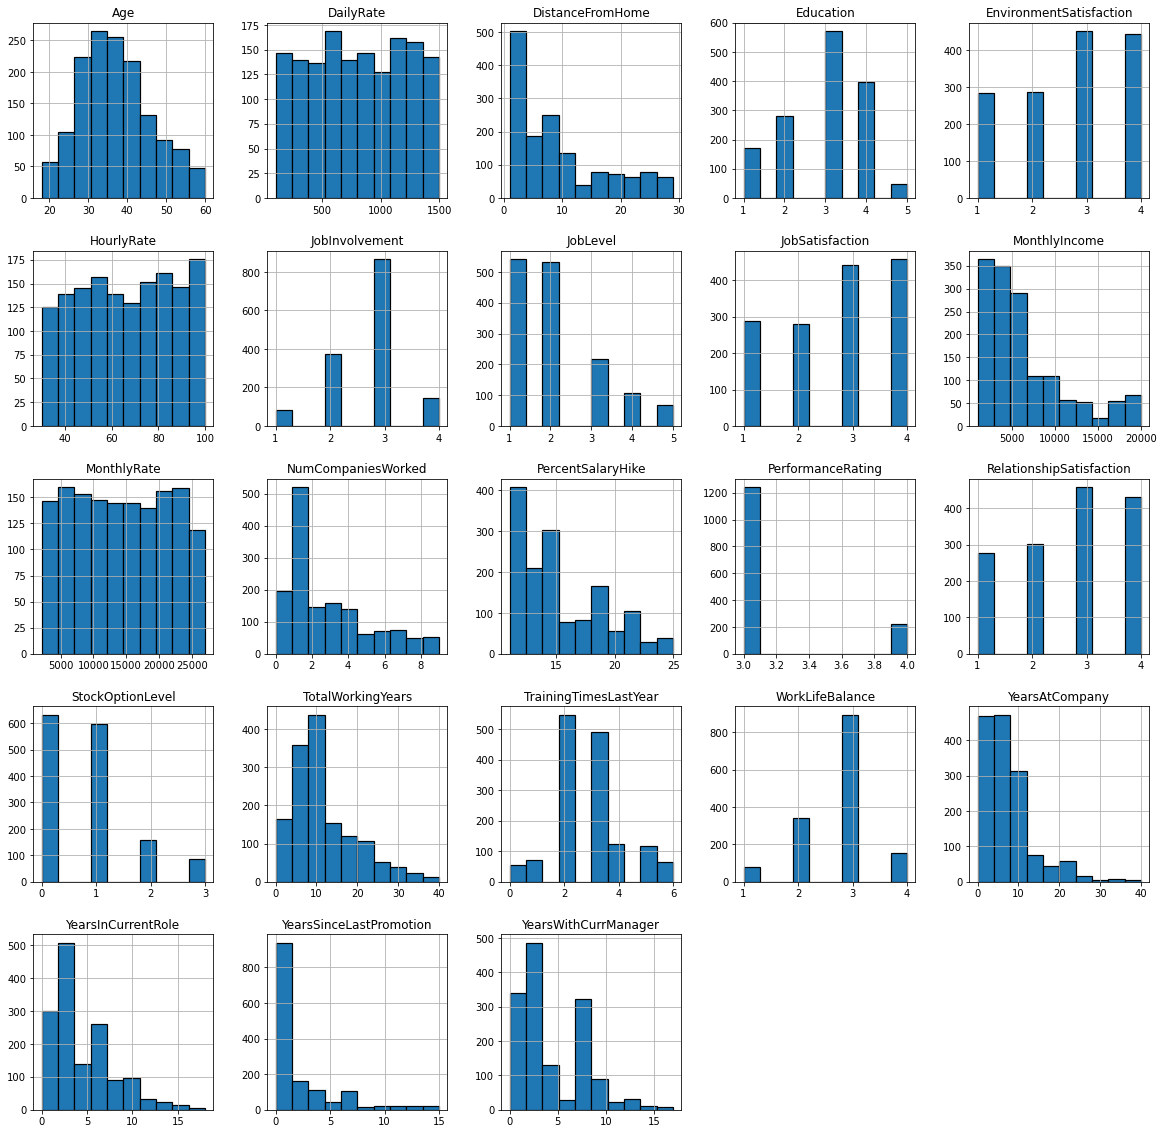

In [11]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

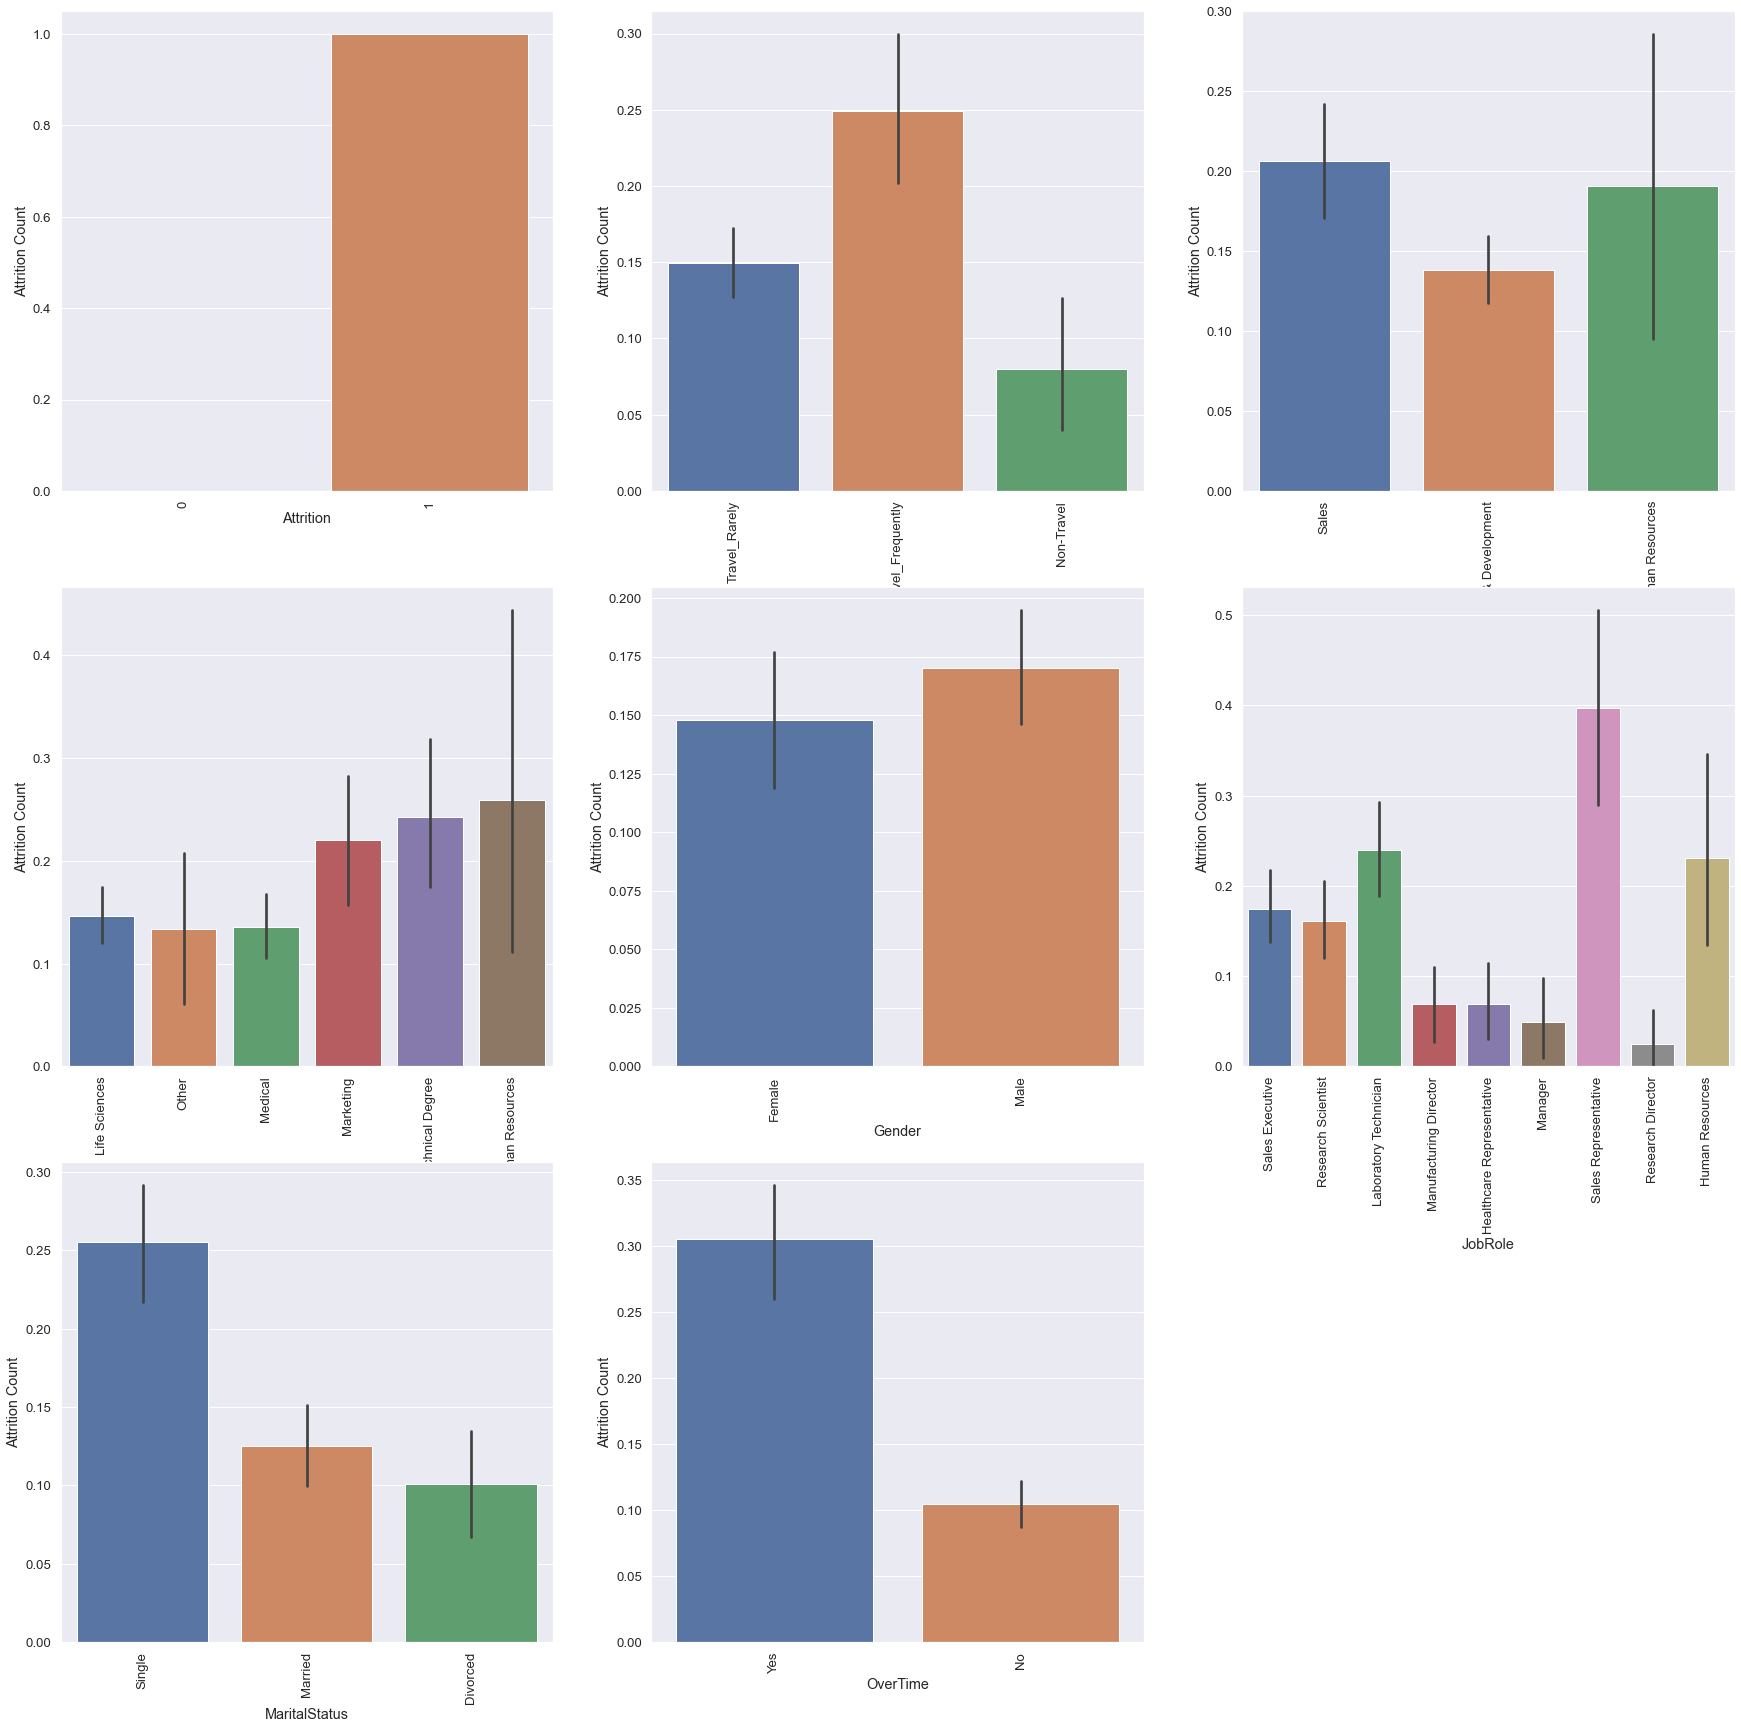

In [12]:
data['Attrition'] = data.Attrition.astype("category").cat.codes

# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

# Data analysis conclusion

### BusinessTravel : The workers who travel alot are more likely to quit then other employees.

### Department : The worker in Research & Development are more likely to stay then the workers on other departement.

### EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

### Gender : The Male are more likely to quit.

### JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

### MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

### OverTime : The workers who work more hours are likely to quit then others.

# 3. Correlation Matrix

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,-0.16,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,...,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
Attrition,-0.16,1.00,-0.06,0.08,-0.03,-0.10,-0.01,-0.13,-0.17,-0.10,...,0.00,-0.05,-0.14,-0.17,-0.06,-0.06,-0.13,-0.16,-0.03,-0.16
DailyRate,0.01,-0.06,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,...,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,0.08,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,...,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.03,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,...,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,-0.10,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,...,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,-0.01,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,...,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,-0.13,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,...,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,-0.17,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,...,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.00,-0.10,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,...,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03


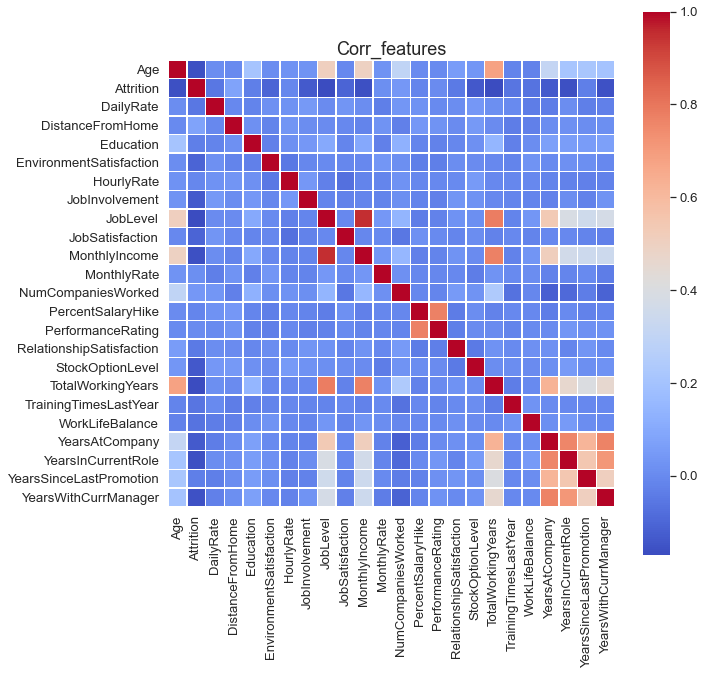

In [13]:
corr = data.corr()
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('Corr_features', size=18);
corr

## Analysis of correlation results (sample analysis):

### Monthly income is highly correlated with Job level.
### Job level is highly correlated with total working hours.
### Monthly income is highly correlated with total working hours.
### Age is also positively correlated with the Total working hours.

# 4. Data Preparation

In [14]:
categorical_col.remove('Attrition')

In [15]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    data[column] = label.fit_transform(data[column])

In [16]:
data['Attrition'] = [ str(x) for x in data['Attrition'] ]
data['Attrition']=data['Attrition'].replace(['Yes','No'],['1','0'])
data['Attrition'] = [ int(x) for x in data['Attrition'] ]
from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

# label is imbalanced

In [19]:
y_train.value_counts()

0    978
1    198
Name: Attrition, dtype: int64

# SMOTE algorithm--Oversampling Technique

# The specific method is SMOTE, which is to enlarge the data of the side with a small amount to achieve the balance of the label. 

In [20]:
oversampler=SMOTE()
X_train, y_train = oversampler.fit_sample(X_train,y_train)

In [21]:
y_train.value_counts()

1    978
0    978
Name: Attrition, dtype: int64

# 5. Machine Learning Algorithms

# a）Logistic Regression

In [22]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred1 = lr_classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred1))

Accuracy: 0.6768707482993197


In [23]:
## 10-fold cross-validation 
cv_scores =cross_val_score(lr_classifier, X, y, cv=10)
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, lr_classifier.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.90      0.70      0.79       255
           1       0.21      0.51      0.30        39

    accuracy                           0.68       294
   macro avg       0.56      0.61      0.54       294
weighted avg       0.81      0.68      0.72       294


Average 10-Fold CV Score: 0.84082 , Standard deviation: 0.00451


[[179  76]
 [ 19  20]]


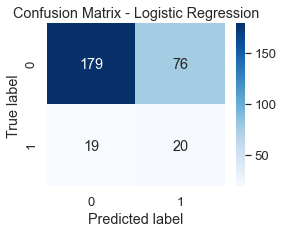

In [24]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,lr_classifier.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");
print(ConfMatrix)

# b）Decision Tree Classifier

In [25]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred1 = tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred1))

Accuracy: 0.7585034013605442


In [26]:
## 10-fold cross-validation 
cv_scores =cross_val_score(tree_clf, X, y, cv=10)
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, tree_clf.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.90      0.82      0.85       255
           1       0.24      0.38      0.30        39

    accuracy                           0.76       294
   macro avg       0.57      0.60      0.58       294
weighted avg       0.81      0.76      0.78       294


Average 10-Fold CV Score: 0.79796 , Standard deviation: 0.02298


In [27]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
y_pred1 = tree_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred1))

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3724 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 11724 tasks      | elapsed:   19.2s


Best paramters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})
Accuracy: 0.7585034013605442


[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   21.4s finished


In [28]:
## 10-fold cross-validation 
cv_scores =cross_val_score(tree_clf, X, y, cv=10)
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, tree_clf.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.89      0.82      0.86       255
           1       0.22      0.33      0.27        39

    accuracy                           0.76       294
   macro avg       0.56      0.58      0.56       294
weighted avg       0.80      0.76      0.78       294


Average 10-Fold CV Score: 0.81905 , Standard deviation: 0.01726


[[210  45]
 [ 26  13]]


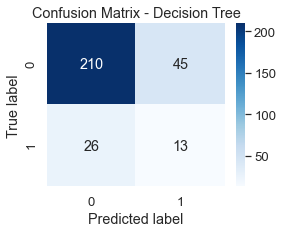

In [29]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,tree_clf.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");
print(ConfMatrix)

# c) Random Forest

In [30]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred1 = rf_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred1))

Accuracy: 0.8741496598639455


In [31]:
## 10-fold cross-validation 
cv_scores =cross_val_score(rf_clf, X, y, cv=10)
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, rf_clf.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.55      0.31      0.39        39

    accuracy                           0.87       294
   macro avg       0.72      0.63      0.66       294
weighted avg       0.85      0.87      0.86       294


Average 10-Fold CV Score: 0.86259 , Standard deviation: 0.01


In [32]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)
y_pred1 = rf_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred1))

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 371 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1019 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1991 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed:  9.0min finished


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8707482993197279


In [33]:
## 10-fold cross-validation 
cv_scores =cross_val_score(rf_clf, X, y, cv=10)
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, rf_clf.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.90      0.95      0.93       255
           1       0.52      0.33      0.41        39

    accuracy                           0.87       294
   macro avg       0.71      0.64      0.67       294
weighted avg       0.85      0.87      0.86       294


Average 10-Fold CV Score: 0.85578 , Standard deviation: 0.01045


[[243  12]
 [ 26  13]]


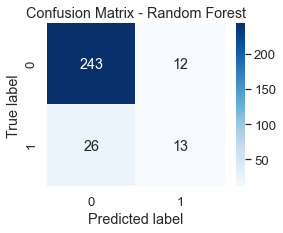

In [34]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,rf_clf.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");
print(ConfMatrix)

# d) Support Vector Machine

In [35]:
svc = SVC(kernel='linear',probability= True)
svc.fit(X_train, y_train)
y_pred1 = svc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred1))

Accuracy: 0.7721088435374149


In [36]:
## 10-fold cross-validation 
cv_scores =cross_val_score(svc, X, y, cv=10)
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, svc.predict(X_test)))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0       0.92      0.80      0.86       255
           1       0.31      0.56      0.40        39

    accuracy                           0.77       294
   macro avg       0.61      0.68      0.63       294
weighted avg       0.84      0.77      0.80       294


Average 10-Fold CV Score: 0.85102 , Standard deviation: 0.0176


[[205  50]
 [ 17  22]]


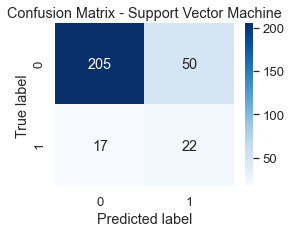

In [37]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,svc.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Support Vector Machine");
print(ConfMatrix)

# e) KNN

In [38]:
best_knn = KNeighborsClassifier(n_neighbors=10) # 选择最优的K=10传入模型
best_knn.fit(X_train,y_train) #训练模型
y_pred1 = best_knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred1))

Accuracy: 0.6564625850340136


In [39]:
## 10-fold cross-validation 
cv_scores =cross_val_score(best_knn, X, y, cv=10)
# Print the 10-fold cross-validation scores
print()
print(classification_report(y_test, y_pred1, digits=3))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0      0.881     0.698     0.779       255
           1      0.163     0.385     0.229        39

    accuracy                          0.656       294
   macro avg      0.522     0.541     0.504       294
weighted avg      0.786     0.656     0.706       294


Average 10-Fold CV Score: 0.84422 , Standard deviation: 0.00642


[[178  77]
 [ 24  15]]


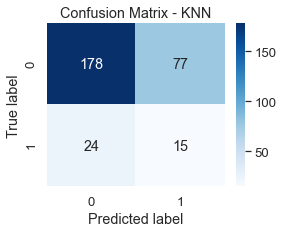

In [40]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,best_knn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN");
print(ConfMatrix)

# f) XGBoost

In [41]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred1 = xgb_clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred1))

Accuracy: 0.8605442176870748


In [42]:
## 10-fold cross-validation 
cv_scores =cross_val_score(xgb_clf, X, y, cv=10)
# Print the 10-fold cross-validation scores
print()
print(classification_report(y_test, y_pred1, digits=3))
print()
print("Average 10-Fold CV Score: {}".format(round(np.mean(cv_scores),5)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),5)))


              precision    recall  f1-score   support

           0      0.912     0.929     0.920       255
           1      0.471     0.410     0.438        39

    accuracy                          0.861       294
   macro avg      0.691     0.670     0.679       294
weighted avg      0.853     0.861     0.856       294


Average 10-Fold CV Score: 0.86803 , Standard deviation: 0.02


[[178  77]
 [ 24  15]]


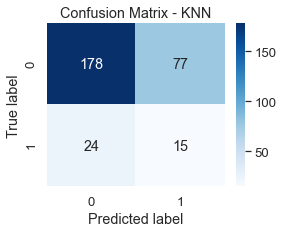

In [43]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,best_knn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN");
print(ConfMatrix)

# The ROC-AUC score

In [44]:
y_pred_proba_lr_classifier = lr_classifier.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_lr_classifier)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_lr_classifier)

y_pred_proba_tree_clf = tree_clf.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_tree_clf)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_tree_clf)

y_pred_proba_rf_clf = rf_clf.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_rf_clf)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_rf_clf)

y_pred_proba_svc = svc.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_svc)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_svc)

y_pred_proba_best_knn = best_knn.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_best_knn)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_best_knn)

y_pred_proba_xgb_clf = xgb_clf.predict_proba(X_test)[::,1]
fpr6, tpr6, _ = metrics.roc_curve(y_test,  y_pred_proba_xgb_clf)
auc6 = metrics.roc_auc_score(y_test, y_pred_proba_xgb_clf)

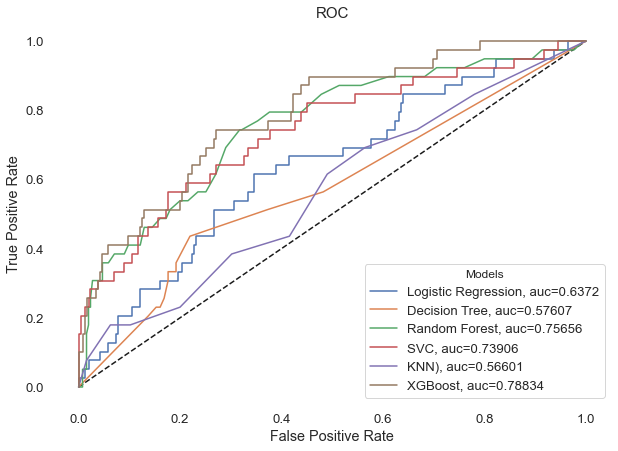

In [45]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr1,tpr1,label="Logistic Regression, auc="+str(round(auc1,5)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,5)))
plt.plot(fpr3,tpr3,label="Random Forest, auc="+str(round(auc3,5)))
plt.plot(fpr4,tpr4,label="SVC, auc="+str(round(auc4,5)))
plt.plot(fpr5,tpr5,label="KNN), auc="+str(round(auc5,5)))
plt.plot(fpr6,tpr6,label="XGBoost, auc="+str(round(auc6,5)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

# Features importance(Random Forest)

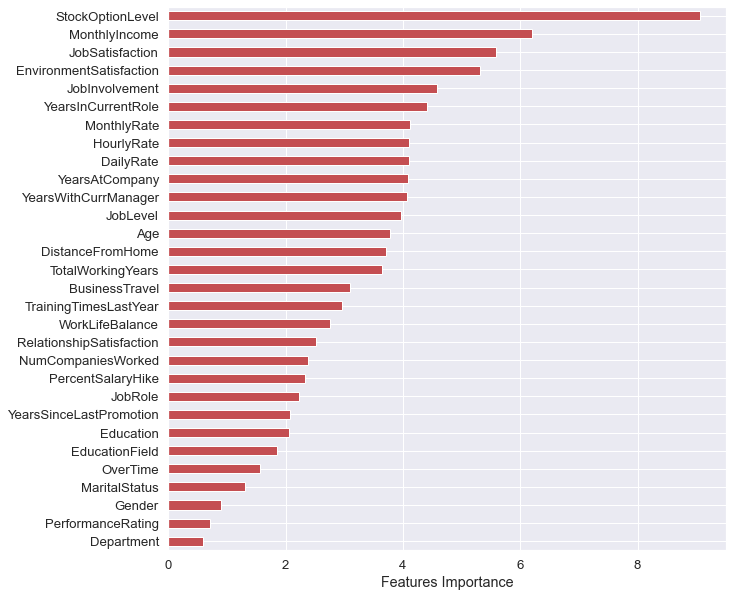

In [46]:
Importance = pd.DataFrame({'Importance':rf_clf.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r',figsize=(10, 10) )
plt.xlabel('Features Importance')
plt.gca().legend_ = None